## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [5]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[64, 32, 16], l2_ratio=0, l1_ratio=0, l1_l2_ratio=0):
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input(input_shape)
    
    for idx, n in enumerate(num_neurons):
        if idx == 0:
            x = keras.layers.Dense(
                units=n, 
                activation="relu", 
                kernel_regularizer=(l2(l2_ratio) if l2_ratio != 0 else (l1(l1_ratio) if l1_ratio != 0 else l1_l2(l1_l2_ratio))),
                name="hidden_layer%d" % (idx))(input_layer)
        else:
            x = keras.layers.Dense(
                units=n, 
                activation="relu", 
                kernel_regularizer=(l2(l2_ratio) if l2_ratio != 0 else (l1(l1_ratio) if l1_ratio != 0 else l1_l2(l1_l2_ratio))),
                name="hidden_layer%d" % (idx))(x)
            
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_REGULIZATION = [1e-12, 1e-8, 1e-4]
L2_REGULIZATION = [1e-12]
L1_L2_REGULIZATION = [1e-12, 1e-8]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_REGULIZATION:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

for regulizer_ratio in L1_REGULIZATION:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

for regulizer_ratio in L1_L2_REGULIZATION:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.000000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 64)                196672    
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 16)                528       
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 199,450
Trainable params: 199,450
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:


50000/50000 [==============================] - 2s 36us/step - loss: 1.4659 - acc: 0.4744 - val_loss: 1.5068 - val_acc: 0.4570
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 64)                196672    
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 16)                528       
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 199,450
Trainable params: 199,450
Non-trainable params: 0
_______________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 45us/step - loss: 3.8885 - acc: 0.2106 - val_loss: 3.6582 - val_acc: 0.2571
Epoch 2/20
50000/50000 [==============================] - 2s 40us/step - loss: 3.5049 - acc: 0.2864 - val_loss: 3.3582 - val_acc: 0.3035
Epoch 3/20
50000/50000 [==============================] - 2s 39us/step - loss: 3.2242 - acc: 0.3217 - val_loss: 3.1041 - val_acc: 0.3301
Epoch 4/20
50000/50000 [==============================] - 2s 43us/step - loss: 2.9902 - acc: 0.3475 - val_loss: 2.8911 - val_acc: 0.3548
Epoch 5/20
50000/50000 [==============================] - 2s 38us/step - loss: 2.8056 - acc: 0.3607 - val_loss: 2.7293 - val_acc: 0.3641
Epoch 6/20
50000/50000 [==============================] - 2s 39us/step - loss: 2.6539 - acc: 0.3701 - val_loss: 2.5892 - val_acc: 0.3737
Epoch 7/20
50000/50000 [==============================] - 2s 38us/step - loss: 2.5253 - acc: 0.3804 - val_loss: 2.4719 - val_acc

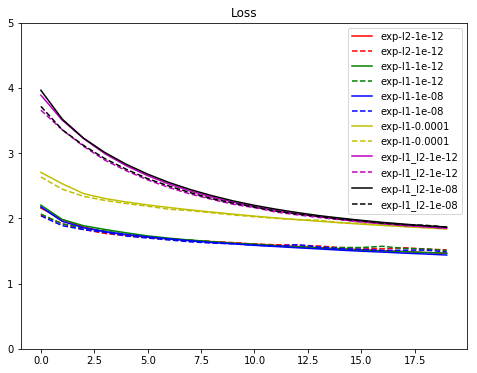

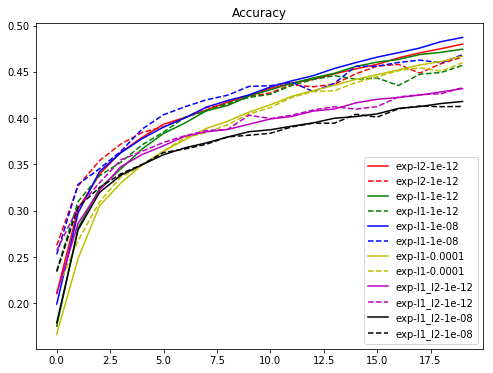

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()